# Image Classification Lab

## Goal
본 실습의 목표는 딥러닝을 이용하여 간단한 이미지 분류기를 제작하는 것입니다. 이를 통해 이미지 처리를 위한 딥러닝 모델의 기본 구성 요소를 파악하고, 모델의 성능을 결정하는 몇 가지 요소들을 살펴볼 것입니다.

## Dataset
본 실습에서 사용할 데이터는 [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) 입니다. 이 데이터는 총 7만 장(Train 60,000, Test 10,000)의 이미지로 구성되어 있습니다. 각 이미지는 가로세로 28 픽셀의 흑백 이미지입니다. 

데이터 샘플:
<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST 데이터는 이미지 처리에서 첫 단계로 많이 활용되는 MNIST와 여러모로 유사합니다. Fashion MNIST 데이터는 기존 MNIST 데이터보다 약간 난이도가 높으면서도, 작은 이미지로 인해 빠르게 테스트를 수행할 수 있어서 새로운 이미지 처리 알고리즘의 작동 여부를 검증하는데 적절합니다.

TensorFlow에서는 Fashion MNIST 데이터를 다운로드하고 불러오기 위한 함수들을 제공합니다.
우선 TensorFlow 및 필요한 패키지들이 설치되어 있는지 확인해볼까요?

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


다음으로, 아래 코드를 통해 Fashion MNIST 데이터를 다운로드하고 불러올 수 있습니다.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

is_normalized = False

4423680/4422102 [==============================] - 0s 0us/step


함수 호출로부터 반환되는 4개의 값은 모두 numpy 행렬이며, 각 파일의 역할은 아래와 같습니다.


*   train_images: training set의 이미지
*   train_labels: training set의 정답값
*   test_images: test set의 이미지
*   test_labels: test set의 정답값

각 이미지는 앞서 언급한 대로 가로세로 28 픽셀의 흑백 이미지이며, 각 픽셀의 값은 0~255의 값을 갖고 있습니다. 정답값은 각 이미지가 어느 카테고리의 상품인지를 0~9의 숫자로 표현했으며, 각 숫자에 해당하는 상품 카테고리는 아래와 같습니다.

<table>
  <tr>
    <th>정답값</th>
    <th>카테고리</th> 
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td> 
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td> 
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td> 
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td> 
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td> 
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td> 
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td> 
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td> 
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td> 
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td> 
  </tr>
</table>

본 데이터셋은 MNIST와 마찬가지로 하나의 상품이 하나의 카테고리에만 속할 수 있습니다.

데이터셋이 어떻게 구성되어 있는지, 다음 코드를 통해 확인해봅시다.

Training set의 이미지 개수: 60000
Test set의 이미지 개수: 10000
이미지 크기: 28 X 28
정답값 예시: [9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4]
이미지 값 예시: 
[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 24

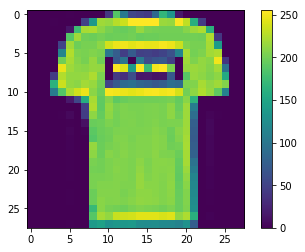

In [4]:
print("Training set의 이미지 개수: %d" %train_images.shape[0])
print("Test set의 이미지 개수: %d" %test_images.shape[0])
print("이미지 크기: %d X %d" %(train_images.shape[1], train_images.shape[2]))
print("정답값 예시: %s" %str(train_labels[:20]))
print("이미지 값 예시: \n%s" %str(train_images[1]))
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()


In [0]:
#[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4] 첫번쨰 클래스 9 앵클  두번쨰 0 티셔츠, 256 이런거 색깔
## 출력 28*28 총 784개 출력

아래 코드를 통해 training set의 첫 25장의 이미지와 각각의 카테고리를 확인할 수 있습니다.

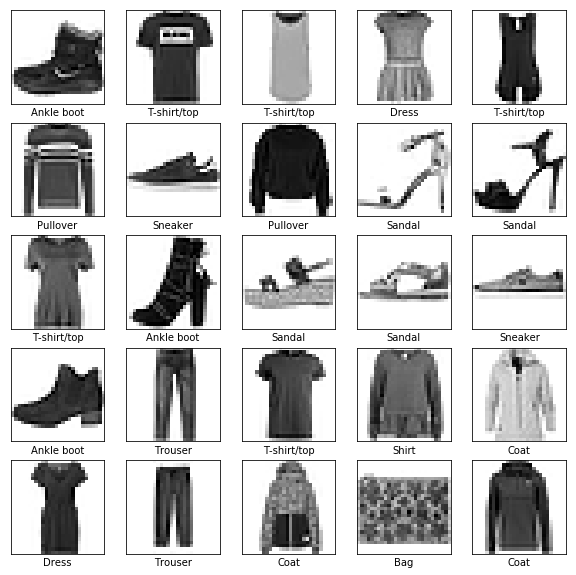

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

마지막으로, 데이터의 값을 신경망 입력으로 사용하기 적절하도록 정규화합시다. 각 픽셀의 값이 0~1의 실수값이 되도록 255로 나누어줍니다.

In [0]:
# 신경망 입력 할떄는 0과 1사이 작은 실수값으로 줄여주는과정 웨이트 곱하고 이런과정하면 숫자 너무 커짐

In [0]:
if not is_normalized:
  train_images = train_images / 255.0  ## 트레인 이미지 60000장*28*28 모든 숫자들을 255로 나눔
  test_images = test_images / 255.0
  
  is_normalized = True

## 초기 모델 생성

데이터가 준비되었으니, 이제 이를 이용하여 훈련시킬 신경망 모델을 만들어봅시다. 대부분의 신경망 모델은 여러 layer를 순차적으로 이어서 만듭니다. 

본 실습에서는 이 과정을 추상화시켜 모델 설계를 쉽게 해주는 tf.keras를 이용할 것입니다. keras.Sequential은 layer들의 배열을 하나의 모델로 이어줍니다.

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), ## 28*28 행렬 을 1*784 행렬로 바꿈 
    keras.layers.Dense(10, activation=tf.nn.softmax) ## 싱글레이어 퍼셉트론 => 덴스라고함 (덴스레이어,완전촘촘연결) 덴스레이어 첫번쨰 파라메터로 몇개 출력할지, 
    # 10개 출력 10개 클래스로 구성 되있어서 클래스에 있을 확률 출력
])
## 배열은 어떤 레이어 이용하는지 알려줌
# 요세 하이레벨로 잘되있어서 모델구현쉬움

W0801 01:43:16.016821 139709846017920 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


여기서 keras.layers.Flatten은 2차원 이미지(28 X 28 픽셀)를 1차원 벡터(784차원)로 만들어주는 역할이며, 별도의 학습을 위한 파라미터는 없습니다.

keras.layers.Dense는 가장 기본적인 신경망 구조인 fully connected layer를 나타냅니다. 여기서 사용된 activation function인 tf.nn.softmax는 모델의 출력을 확률분포로 바꾸어주는 역할로, 일반적으로 신경망 모델의 마지막 layer에 사용됩니다.

## 모델 훈련
이제 모델의 손실 함수(loss function)와 파라미터 최적화 방법을 정의할 차례입니다. 이는 다음 명령어로 수행할 수 있습니다.

In [0]:
# optimizer 어떤 그래디언트 디센트 알고리즘 사용할지, (산내려가는 방법도 다양 뛰어내려가기 경사깊은곳내려가기 등등)
# sparse 카테고리가 각각 하나씩 할당되있다. 하나의 사진은 하나의 클래스에 속해있는것을 sparse 하다 카테고리중 하나의 속하다. crossentropy 로스 함수 종류 모델이 만들어내는 출력,정답 사이 거리를 수치화 
# metrics 성능 측정

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

그 다음, 모델을 훈련시킵니다. 훈련은 입력으로부터 출력을 계산하는 forward pass와, 손실 함수로부터 gradient를 계산하고 이를 바탕으로 파라미터를 업데이트하는 backward pass를 반복하는 과정으로 진행됩니다.

이러한 과정은 아래 명령어를 통해 수행됩니다.

In [10]:
history = model.fit(train_images, ## history 모델 학습과정 어떻게 했는지 딕셔너리로 저장 -> 시각화
          train_labels,
          epochs=10,
          validation_data=(test_images, test_labels) # 모델 성능 평가
         )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.5982 - acc: 0.7990 - val_loss: 0.5098 - val_acc: 0.8262
Epoch 2/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.4616 - acc: 0.8434 - val_loss: 0.4726 - val_acc: 0.8357
Epoch 3/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.4366 - acc: 0.8498 - val_loss: 0.4636 - val_acc: 0.8365
Epoch 4/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.4223 - acc: 0.8544 - val_loss: 0.4578 - val_acc: 0.8379
Epoch 5/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.4130 - acc: 0.8569 - val_loss: 0.4599 - val_acc: 0.8386
Epoch 6/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.4058 - acc: 0.8592 - val_loss: 0.4636 - val_acc: 0.8381
Epoch 7/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.4027 - acc: 0.8599 - val_loss: 0.

In [0]:
## 기계학습 시험공부하는거, 
## 한에폭 문제집을 한번푸는거 에폭 10 문제집을 10번푸는거
#

여기서 epochs는 훈련을 얼마나 많이 시킬지를 나타냅니다. 전체 데이터에 대해 1회 훈련을 마치는 것을 1 epoch라고 합니다. 따라서 5 epochs는 전체 데이터에 대해 총 5회 반복 훈련시킨 것이라고 이해할 수 있습니다.

fit() 메소드로부터 반환되는 history에는 모델의 훈련 과정에 대한 정보가 담겨 있습니다. 여기에는 training set과 test set에 대한 손실 함수의 값도 포함되어 있습니다. 아래 코드를 이용하여 이를 확인해봅시다.

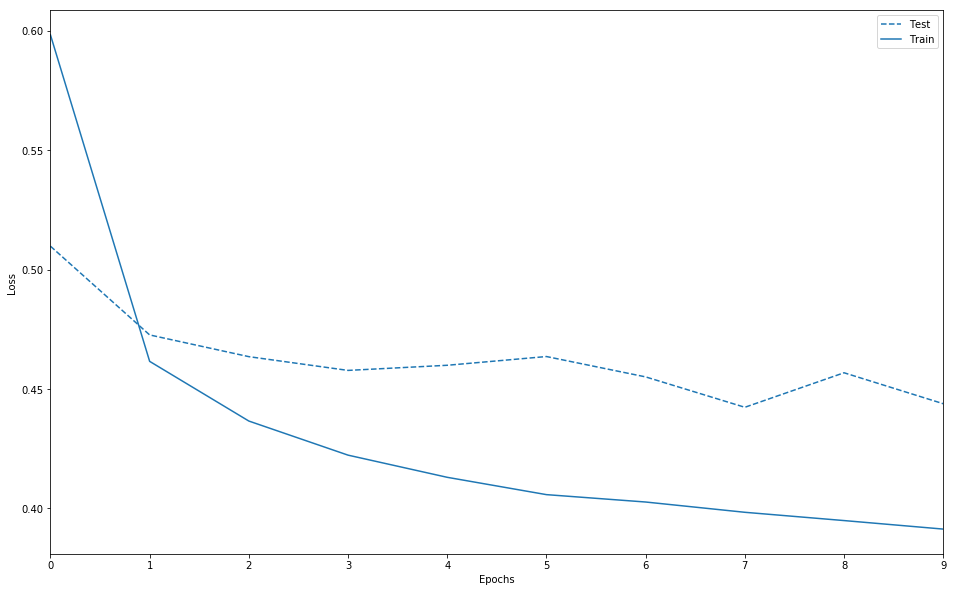

In [11]:
def plot_loss(history):
  plt.figure(figsize=(16,10))
  val = plt.plot(history.epoch, history.history['val_loss'],
                 '--', label='Test')
  plt.plot(history.epoch, history.history['loss'], color=val[0].get_color(),
           label='Train')

  plt.xlabel('Epochs')
  plt.ylabel("Loss")
  plt.legend()

  plt.xlim([0,max(history.epoch)])

plot_loss(history)

In [0]:
# 시각화한 결과
# x 학습진행 시간, 세로 로스
# 딥러닝 모델 학습시킬떄 로스, 정확도가 어떻게 변하는지 그래프 본다
# 이그래프를 통해 모델이 어떻게 학습되는지 알수 있따.
# 실선 학습데이터 로스가 어떻게 떨어졌는지 문제집을 얼마나 덜틀렸는지
# 점선 테스트 데이터 실제 시험을 봤을때 아무리공부해도 어느정도 이상 안떨어짐 진전이 없음
# 그래프가 다 다르게 나오는 이유 => 파라메터 초기 시작 값을 랜덤으로 무작위로 초기화 하는 알고리즘 쓴다 => 케라스 알아서 최적의 값으로 초기화 해준다.
# ex 산은 똑같은데 시작지점을 다르게 한다는 느낌, 내려가는 경로, 도달 지점이 달라지게 된다.

## 모델 성능 평가

훈련된 모델의 성능을 평가하기 위해 test set을 이용합니다. training set과 분리된 별도의 데이터를 이용해 성능을 평가하는 이유는 모델의 새로운 데이터에 대한 대응 능력을 확인하기 위한 것입니다. 이를 generalization이라고 합니다.

성능 평가는 아래 명령어를 통해 수행할 수 있습니다.

In [12]:
def eval_model(model):
  test_loss, test_acc = model.evaluate(test_images, test_labels)
  print('Test accuracy:', test_acc) ## 모델이 성능이 어느정도인지 100장이면 84장은 맞고 나머지 틀리다.
  
eval_model(model)

10000/10000 [==============================] - 0s 42us/sample - loss: 0.4439 - acc: 0.8454
Test accuracy: 0.8454


현재 단계에서는 약 84% 안팎의 성능이 나타날 것입니다. 

모델의 파라미터는 훈련되기 전 무작위 값으로 초기화되는데, 초기화 값에 따라 훈련된 모델의 성능이 달라집니다. 따라서 동일한 모델이라도 학습할 때마다 성능에 편차가 생깁니다.

## Multi-Layer Perceptron(MLP)

앞서 만들었던 모델에 은닉층을 추가하여 성능을 올려봅시다. 활성함수는 tf.nn.tanh를 사용하겠습니다.

In [0]:

레이어마다 출력몇개 , 레이어몇개(하이퍼 파라메터)

=> 모델 설계자가 감으로 , 
자동화 알고리즘 없다.( 어떤 하이퍼파라메터+모델 -> 최고성능 이것도 학습시키는거 애초에 하나의 학습이 7일씩 걸려서 인풋데이터가 10개만 되도 70일 존나 돈많이 드는 작업 거의 불가능)

In [0]:
# Your code here
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), ## 28*28 행렬 을 1*784 행렬로 바꿈 
    keras.layers.Dense(512, activation= tf.nn.tanh), ## 사이에 있는 레이어들은 512개 출력
    keras.layers.Dense(512, activation= tf.nn.tanh),
    keras.layers.Dense(10, activation=tf.nn.softmax) ## 싱글레이어 퍼셉트론 => 덴스라고함 (덴스레이어,완전촘촘연결) 덴스레이어 첫번쨰 파라메터로 몇개 출력할지, 
    # 10개 출력 10개 클래스로 구성 되있어서 클래스에 있을 확률 출력
])
## 배열은 어떤 레이어 이용

입력공간을 직선에서 곡선(레이어 추가하면서) 학습 능률이 늘어남

그 다음으로 앞서 진행했던 [모델 훈련](#scrollTo=IfHQVj5g0iFo)과 [모델 성능 평가](#scrollTo=u8etrDl61kQH&line=5&uniqifier=1) 부분을 다시 실행하여 변경된 모델의 성능을 측정해봅시다.

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.4875 - acc: 0.8226 - val_loss: 0.5058 - val_acc: 0.8071
Epoch 2/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3792 - acc: 0.8615 - val_loss: 0.4069 - val_acc: 0.8499
Epoch 3/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3504 - acc: 0.8705 - val_loss: 0.4001 - val_acc: 0.8461
Epoch 4/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3266 - acc: 0.8788 - val_loss: 0.3668 - val_acc: 0.8627
Epoch 5/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3150 - acc: 0.8825 - val_loss: 0.3705 - val_acc: 0.8678
Epoch 6/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3038 - acc: 0.8872 - val_loss: 0.3593 - val_acc: 0.8689
Epoch 7/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2913 - acc: 0.8909 - val_loss: 0.

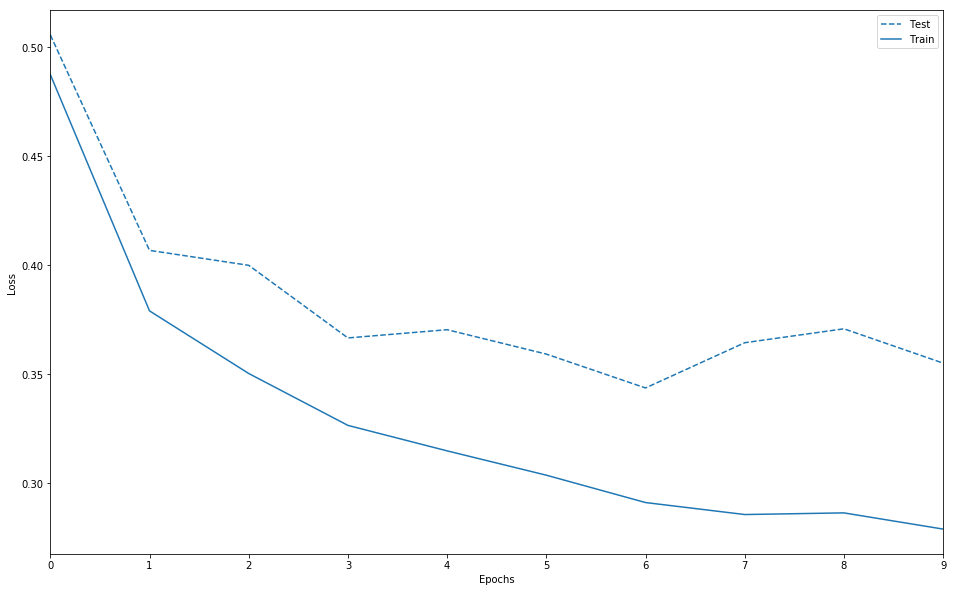

In [15]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images,
          train_labels,
          epochs=10,
          validation_data=(test_images, test_labels)
         )

plot_loss(history)
eval_model(model)

약 87% 안팎의 성능이 나올 것입니다.

은닉층을 더 많이 추가하면 성능이 더 올라갈까요? 은닉층의 수를 더 늘려보겠습니다.

In [19]:
# Your code heremodel = 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), ## 28*28 행렬 을 1*784 행렬로 바꿈 
    keras.layers.Dense(512, activation= tf.nn.tanh), ## 사이에 있는 레이어들은 512개 출력
    keras.layers.Dense(512, activation= tf.nn.tanh),
    keras.layers.Dense(512, activation= tf.nn.tanh),
    keras.layers.Dense(512, activation= tf.nn.tanh),
    keras.layers.Dense(512, activation= tf.nn.tanh),
    keras.layers.Dense(512, activation= tf.nn.tanh),
    keras.layers.Dense(512, activation= tf.nn.tanh),
    keras.layers.Dense(512, activation= tf.nn.tanh),
    keras.layers.Dense(10, activation=tf.nn.softmax) ])## 싱글레이어 퍼셉트론 => 덴스라고함 (덴스레이어,완전촘촘연결) 덴스레이어 첫번쨰 파라메터로 몇개 출력할지, 
    # 10개 출력 10개 클래스로 구성 되있어서 클래스에 있을 확률 출력


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2386 - acc: 0.9111 - val_loss: 0.3691 - val_acc: 0.8790
Epoch 2/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2381 - acc: 0.9112 - val_loss: 0.3654 - val_acc: 0.8809
Epoch 3/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2407 - acc: 0.9102 - val_loss: 0.3601 - val_acc: 0.8788
Epoch 4/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2362 - acc: 0.9128 - val_loss: 0.3875 - val_acc: 0.8700
Epoch 5/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2329 - acc: 0.9133 - val_loss: 0.4021 - val_acc: 0.8718
Epoch 6/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2281 - acc: 0.9151 - val_loss: 0.3678 - val_acc: 0.8824
Epoch 7/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2324 - acc: 0.9131 - val_loss: 0.

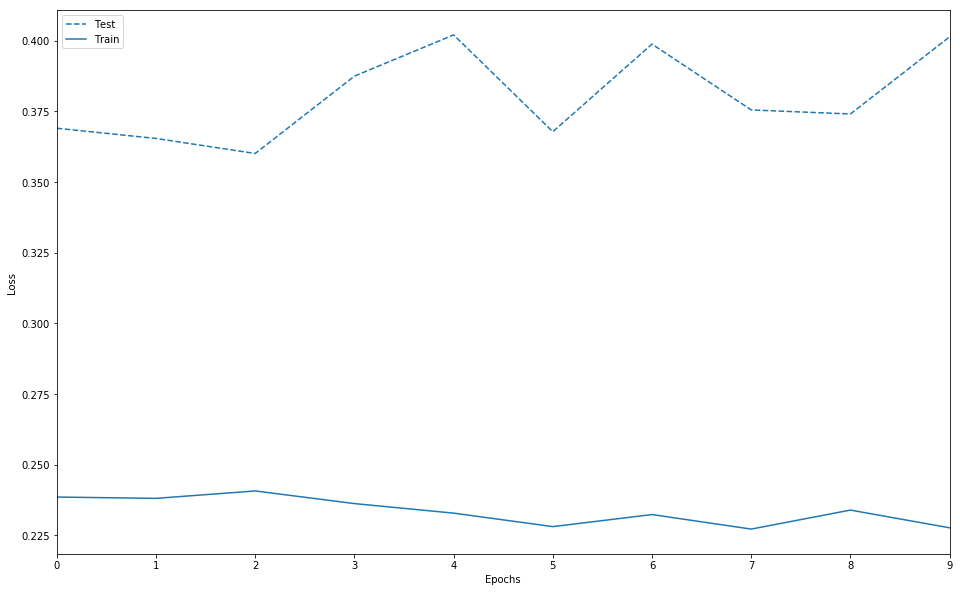

In [20]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images,
          train_labels,
          epochs=10,
          validation_data=(test_images, test_labels)
         )

plot_loss(history)
eval_model(model)

In [0]:
# 원하는 정답값 - 원핫인코딩 정답만 1 나머지 0 => 정답클래스에 대한 확률 분포
# 모델 출력 확률분포 클래스 속할 확률 몇프로 몇프로 모델이 예측한 클래스 
# 분포간 차이크면 엔트로피 크다 => 두 분포간 차이 크로스 엔트로피로 인해 두 확률분포사이 차이를 계산 => 
# loss 계산 ex) 이미지는 각픽셀간 거리 계산 이런걸로 로스 계산

앞서 진행했던 [모델 훈련](#scrollTo=IfHQVj5g0iFo)과 [모델 성능 평가](#scrollTo=u8etrDl61kQH&line=5&uniqifier=1) 과정을 수행하면 약 80% 안팎의 성능이 나올 것입니다. 왜 오히려 성능이 더 떨어졌을까요?

하이퍼볼릭 탄젠트 x 입력, y출력 -1 ` 사이 (활성함수)

## ppt참고

## ReLU 사용

활성 함수를 ReLU (tf.nn.relu)로 변경해봅시다. 여기서 모델의 출력을 확률분포로 바꿔주는 softmax 활성함수는 변경하면 안됩니다. ## 일반적으로 소프트맥스는 맨마지막 출력때만 쓰는거

In [0]:
# Your code here

# Your code heremodel = 
model = keras.Sequential([
    
    keras.layers.Flatten(input_shape=(28, 28)), ## 28*28 행렬 을 1*784 행렬로 바꿈 
    keras.layers.Dense(512, activation= tf.nn.relu), ## 사이에 있는 레이어들은 512개 출력
    keras.layers.Dense(512, activation= tf.nn.relu),
    keras.layers.Dense(512, activation= tf.nn.relu),
    keras.layers.Dense(512, activation= tf.nn.relu),
    keras.layers.Dense(512, activation= tf.nn.relu),
    keras.layers.Dense(512, activation= tf.nn.relu),
    keras.layers.Dense(512, activation= tf.nn.relu),
    keras.layers.Dense(512, activation= tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax) ])## 싱글레이어 퍼셉트론 => 덴스라고함 (덴스레이어,완전촘촘연결) 덴스레이어 첫번쨰 파라메터로 몇개 출력할지, 
    # 10개 출력 10개 클래스로 구성 되있어서 클래스에 있을 확률 출력


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 134us/sample - loss: 0.6107 - acc: 0.7789 - val_loss: 0.4633 - val_acc: 0.8384
Epoch 2/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.4434 - acc: 0.8434 - val_loss: 0.4196 - val_acc: 0.8518
Epoch 3/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.4021 - acc: 0.8592 - val_loss: 0.4331 - val_acc: 0.8543
Epoch 4/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.3715 - acc: 0.8693 - val_loss: 0.3885 - val_acc: 0.8660
Epoch 5/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.3450 - acc: 0.8773 - val_loss: 0.3969 - val_acc: 0.8616
Epoch 6/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.3359 - acc: 0.8820 - val_loss: 0.3764 - val_acc: 0.8703
Epoch 7/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.3181 - acc: 0.8869 - val_l

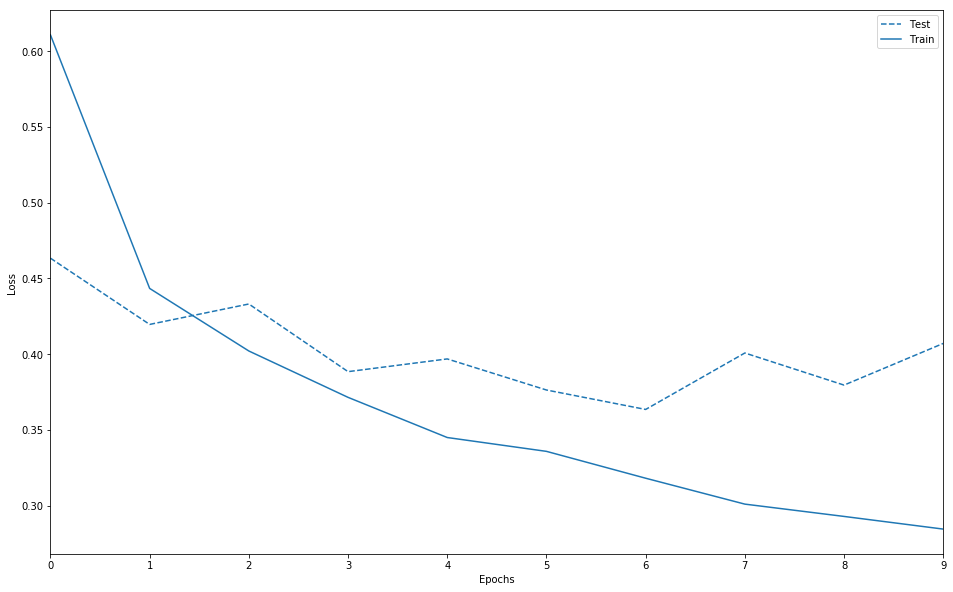

In [23]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images,
          train_labels,
          epochs=10,
          validation_data=(test_images, test_labels)
         ) ## 배치값 기본으로 지정 되있다.

plot_loss(history)
eval_model(model)

[모델 훈련](#scrollTo=IfHQVj5g0iFo)과 [모델 성능 평가](#scrollTo=u8etrDl61kQH&line=5&uniqifier=1) 과정을 수행하면 약 87% 안팎의 성능이 나올 것입니다. Vanishing gradient 문제는 많이 해소가 되었지만, layer가 적을 때와 비교해서 성능 향상이 거의 없습니다. 결과적으로 불필요하게 모델의 파라미터만 크게 증가하게 되었습니다. 이는 느린 학습 속도에서도 잘 나타납니다.

모델이 이미지 분류에 특화되있지 않아서 그럼

## Convolutional Neural Network으로 변경

모델 구조를 fully connected network에서 convolutional neural network(CNN)으로 변경해봅시다. 여기서 사용할 2차원 CNN은 1차원 벡터를 입력으로 사용하지 않기 때문에 최초의 keras.layers.Flatten은 제거해야 합니다. 

컬러 이미지의 경우 3차원(가로, 세로, 색상)으로 구성됩니다. 하지만 본 데이터는 흑백이므로 2차원(가로, 세로)로 구성되어 있습니다. CNN은 컬러 이미지를 만들어져 있으므로 우리의 데이터도 3차원으로 변형시켜줘야 합니다. 이를 위해 keras.layers.Reshape을 최초 layer로 사용합니다.

CNN layer의 출력은 3차원이므로 이를 확률분포로 바꾸기 위해서는 이를 1차원으로 바꿔줘야 합니다. 이를 위해 Flatten layer를 CNN와 Dense layer 사이에 추가합니다. 

마지막 softmax layer는 이전과 동일하게 유지하면 됩니다.

아래의 네트워크 구조가 만들어지도록 필요한 layer들을 배열해보시기 바랍니다. Convolution과 pooling을 더 추가하는것도 가능합니다.

<table>
  <tr><td>
    <img src="http://www.wildml.com/wp-content/uploads/2015/11/Screen-Shot-2015-11-07-at-7.26.20-AM-1024x279.png"
         alt="Fashion MNIST sprite"  width="100%">
  </td></tr>
</table>


다음 layer들을 잘 활용해보세요.

*   [tf.keras.layers.Reshape](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Reshape)
*   [tf.keras.layers.Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)
*   [tf.keras.layers.Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten)
*   [tf.keras.layers.Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)
*   [tf.keras.layers.MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)


In [0]:
model = keras.Sequential([
    keras.layers.Reshape((28,28,1), input_shape=(28, 28)),

    keras.layers.Conv2D(16, 3, padding="same",activation=tf.nn.relu),
    keras.layers.MaxPool2D(2, padding = "same"),
    
    keras.layers.Conv2D(32, 3, padding="same",activation=tf.nn.relu),
    keras.layers.MaxPool2D(2, padding = "same"),
    
    keras.layers.Conv2D(64, 3, padding="same",activation=tf.nn.relu),

    
    
    keras.layers.Flatten(input_shape=(7,7)),
    keras.layers.Dense(512, activation= tf.nn.relu), 
    keras.layers.Dense(512, activation= tf.nn.softmax)
   
    ## 7*7*64를 쫙펴서 덴스레이어 
])

reshape 시퀀셜 첫번쨰 레이어 cnn이 칼라이미지입력만
28*28*3(채널)  3차원짜리 입력이 주워져야되는데
흑백이라 채널이 1개 따라서 컨볼루션 레이어 입력에 사용할수 x reshpae해서 cnn 입력에 사용할수 있도록

쉐입을(28,28,1) 이런식으로 없는채널은 안만들고 

conv2d (텐서플로서 함수 뜯어봄)
필터(커널을 몇개사용할지)
커널크기
padding = Same 패팅 하지 않음 크기 그대로
padding = valid 입력 이미지와 출력해상도 같도록 패딩 알아서 채워줌
activation cnn도 활성화함수 우리는 relu쓴다

Maxpool2D
풀사이즈( 2*2 에서 최대값을 뽑음)


In [0]:
# Your code here

학습 데이터는 떨어졌는데 테스트는 계속 상승



모델 복잡도 

복잡한모델 -> 학습데이터에서는 성능


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 172us/sample - loss: 0.4192 - acc: 0.8535 - val_loss: 0.3077 - val_acc: 0.8877
Epoch 2/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.2622 - acc: 0.9036 - val_loss: 0.2608 - val_acc: 0.9055
Epoch 3/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.2167 - acc: 0.9195 - val_loss: 0.2453 - val_acc: 0.9099
Epoch 4/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.1851 - acc: 0.9309 - val_loss: 0.2382 - val_acc: 0.9162
Epoch 5/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.1541 - acc: 0.9421 - val_loss: 0.2375 - val_acc: 0.9165
Epoch 6/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.1290 - acc: 0.9521 - val_loss: 0.2559 - val_acc: 0.9183
Epoch 7/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.1047 - acc: 0.9601 - val_

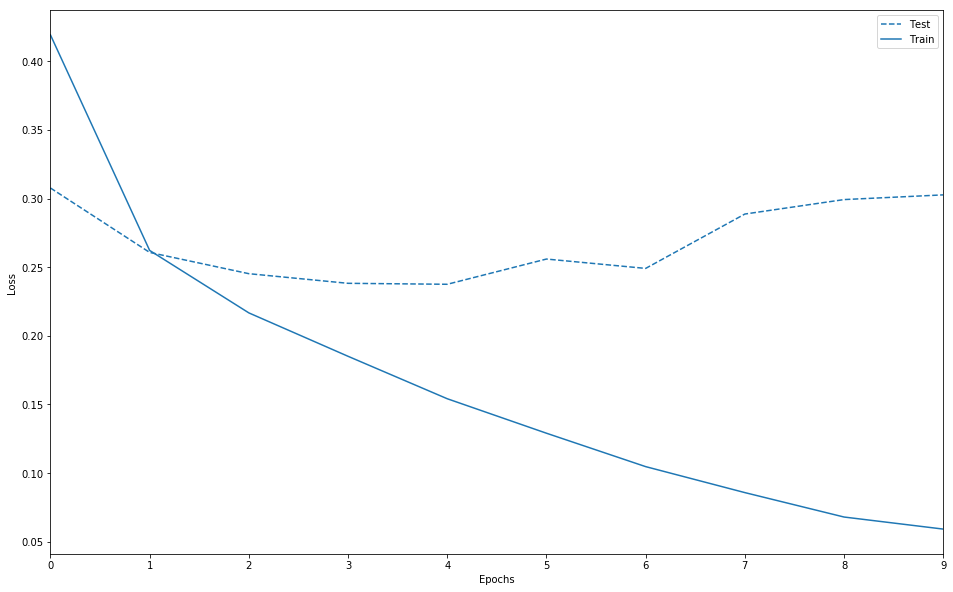

In [28]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images,
          train_labels,
          epochs=10,
          validation_data=(test_images, test_labels)
         )

plot_loss(history)
eval_model(model)

[모델 훈련](#scrollTo=IfHQVj5g0iFo)과 [모델 성능 평가](#scrollTo=u8etrDl61kQH&line=5&uniqifier=1) 과정을 수행하면 약 90% 안팎의 성능이 나올 것입니다. 더 적은 수의 파라미터로 더 높은 성능을 끌어낼 수 있었습니다.

## Overfitting 문제 및 해소 방법

모델이 overfitting되는 상황 및 해소 방법을 실습해보겠습니다.

우선, overfitting 현상이 나타나도록 training set의 크기를 축소시킨 후 더 긴 시간동안 훈련을 진행해보겠습니다.
모델은 CNN을 이용한 것으로 사용하겠습니다.


In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images[:2000],
          train_labels[:2000],
          epochs=30,
          validation_data=(test_images, test_labels)
         )

In [0]:
plot_loss(history)
eval_model(model)

Training set에 대한 손실함수의 값은 꾸준히 하락한 반면, test set에 대한 손실함수의 값은 어느 정도 하락하다가 다시 상승하는 것을 확인할 수 있습니다. 이는 전형적인 overfitting의 형상입니다.

모델에 [tf.keras.layers.Dropout](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)을 추가해봅시다.

## 풀리커넥트 레이어에  넣어야 성능이 좋다
## 데이터 모델에 따라 다 달라지므로 노가다에 어느장소에 넣으면 좋다 이런거 찾아야함

In [0]:
# Your code here



drop_rate = 0.2

model = keras.Sequential([
    keras.layers.Reshape((28,28,1), input_shape=(28, 28)),

    keras.layers.Conv2D(16, 3, padding="same",activation=tf.nn.relu),
    keras.layers.Dropout(rate=drop_rate),
    keras.layers.MaxPool2D(2, padding = "same"),
    
    keras.layers.Conv2D(32, 3, padding="same",activation=tf.nn.relu),
    keras.layers.Dropout(rate=drop_rate),
    keras.layers.MaxPool2D(2, padding = "same"),
    
    keras.layers.Conv2D(64, 3, padding="same",activation=tf.nn.relu),
    keras.layers.Dropout(rate=drop_rate),
    
    
    keras.layers.Flatten(input_shape=(7,7)),
    keras.layers.Dense(512, activation= tf.nn.relu), 
    keras.layers.Dense(512, activation= tf.nn.softmax)
   
    ## 7*7*64를 쫙펴서 덴스레이어 
])



In [32]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images[:2000],
          train_labels[:2000],
          epochs=30,
          validation_data=(test_images, test_labels)
         )

Train on 2000 samples, validate on 10000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 720us/sample - loss: 1.4058 - acc: 0.5755 - val_loss: 0.7559 - val_acc: 0.7434
Epoch 2/30
2000/2000 [==============================] - 1s 490us/sample - loss: 0.6321 - acc: 0.7795 - val_loss: 0.6773 - val_acc: 0.7698
Epoch 3/30
2000/2000 [==============================] - 1s 445us/sample - loss: 0.5720 - acc: 0.7930 - val_loss: 0.6029 - val_acc: 0.7934
Epoch 4/30
2000/2000 [==============================] - 1s 442us/sample - loss: 0.4961 - acc: 0.8325 - val_loss: 0.5278 - val_acc: 0.8091
Epoch 5/30
2000/2000 [==============================] - 1s 440us/sample - loss: 0.4321 - acc: 0.8420 - val_loss: 0.5521 - val_acc: 0.7893
Epoch 6/30
2000/2000 [==============================] - 1s 438us/sample - loss: 0.3844 - acc: 0.8585 - val_loss: 0.5040 - val_acc: 0.8307
Epoch 7/30
2000/2000 [==============================] - 1s 439us/sample - loss: 0.3525 - acc: 0.8755 - val_loss: 0.4536 - v

10000/10000 [==============================] - 1s 71us/sample - loss: 0.5349 - acc: 0.8497
Test accuracy: 0.8497


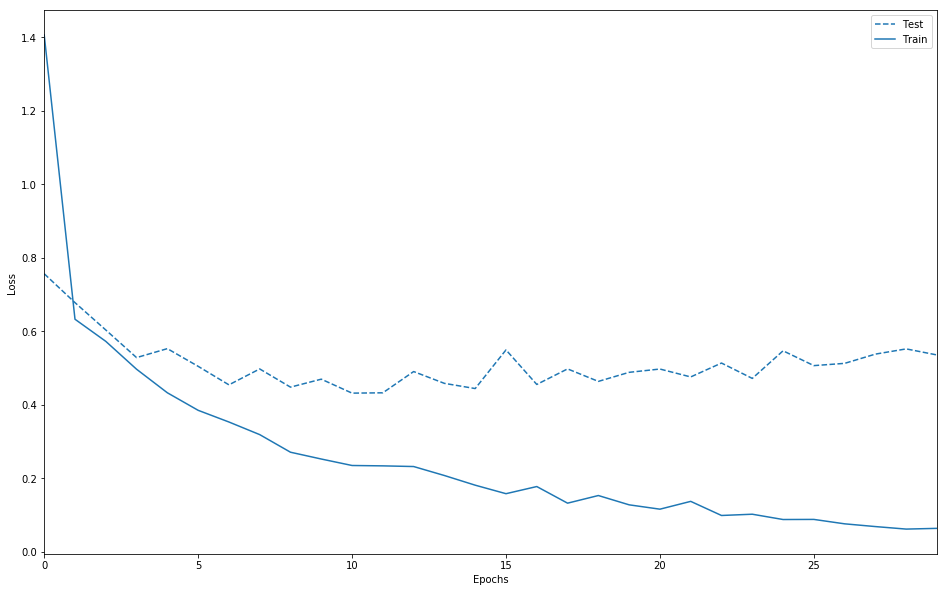

In [33]:
plot_loss(history)
eval_model(model)

In [0]:
## 트레이닝 로스가 많이 줄어든거 볼수 있따.